## This Notebook contains:
- Reading the datset from Northeastern university
- Modelling for classification models
- Calculation of Error metrices
- Summarizing Models at the end


In [251]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import pickle

     Importing the dataset

In [5]:
dataset = pd.read_csv('../../Data/all_records_northeastern.csv')

Dropping the column, Unnamed as it is not necessary

In [6]:
dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
dataset.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,status
0,316,164,152,99.0,3.12,12,0,reject
1,316,164,152,99.0,3.12,12,0,reject
2,316,160,156,114.0,2.97,0,0,reject
3,317,168,149,106.0,2.83,15,0,reject
4,317,161,156,106.0,2.01,0,0,reject


Count of accept and reject in dataset

In [8]:
dataset.status.value_counts()

reject    1079
accept     574
Name: status, dtype: int64

As we see from above stats, our data is baised so we need to resample the data, in order to balanced dataset

In [9]:
balanced_data=resample(dataset[dataset.status=='accept'],replace=True,n_samples=1000,random_state=123)
balanced_data=balanced_data.append(dataset[dataset.status=='reject'])

In [10]:
balanced_data.status.value_counts()

reject    1079
accept    1000
Name: status, dtype: int64

In [11]:
encoded_dataset=balanced_data

In [12]:
encoded_dataset.head()

,gre_score,gre_score_quant,gre_score_verbal,test_score_toefl,undergraduation_score,work_ex,papers_published,status
1589,314,165,149,100.0,2.90,0,2,accept
1444,315,162,153,100.0,3.30,60,0,accept
1461,309,163,146,104.0,2.64,32,0,accept
1401,310,162,148,99.0,2.85,24,0,accept
1177,320,170,150,104.0,3.86,2,1,accept


Defining labels-X and Tragets-Y

In [13]:
X=encoded_dataset[['gre_score_quant','gre_score_verbal','test_score_toefl','undergraduation_score','work_ex','papers_published']].copy()
Y=encoded_dataset[['status']].copy()

Splitting the dataset_encoded into training and testing dataset 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)


Training the model

In [32]:

def modeltraining(model,X_train,X_test,Y_train,Y_test):
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    
    X_test = sc.transform(X_test)
    print(X_test)
    model.fit(X_train,Y_train)
    predicted_labels_test=model.predict(X_test)
    predicted_labels_train=model.predict(X_train)
    accuracy_test=accuracy_score(Y_test,predicted_labels_test)
    accuracy_train=accuracy_score(Y_train,predicted_labels_train)
    
    
    return model,predicted_labels_test,predicted_labels_train,accuracy_test,accuracy_train,sc

Calling RandomForest model

In [33]:
model=RandomForestClassifier()
model,predicted_labels_test,predicted_labels_train,accuracy_test,accuracy_train,sc=modeltraining(model,X_train,X_test,Y_train,Y_test)

[[-0.1189225   0.73491402  0.39076816 -0.36262002 -0.62058721  1.89123818]
 [ 0.78723151 -0.2849141   0.43531487  0.59052431  0.41333471  1.89123818]
 [ 0.10761601 -0.48887972  0.12348788 -0.03768445  0.2308779  -0.59699686]
 ...
 [ 1.24030852  1.5507765   0.70259515  0.87213514 -1.04631976 -0.59699686]
 [ 1.01377002  1.5507765  -4.37573011 -2.09560971  1.14316194 -0.59699686]
 [ 0.33415451  2.16267337  0.5244083  -0.01602208  0.83906726 -0.59699686]]


C:\Users\lnuak\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Test data

In [34]:
accuracy_test

0.8317307692307693

Accuracy of Train data

In [35]:
accuracy_train

0.9897775105231509

In [36]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
print(classification_report(Y_test,predicted_labels_test))

              precision    recall  f1-score   support

      accept       0.78      0.90      0.84       199
      reject       0.89      0.77      0.83       217

   micro avg       0.83      0.83      0.83       416
   macro avg       0.84      0.83      0.83       416
weighted avg       0.84      0.83      0.83       416



In [38]:
print(classification_report(Y_train,predicted_labels_train))

              precision    recall  f1-score   support

      accept       0.98      1.00      0.99       801
      reject       1.00      0.98      0.99       862

   micro avg       0.99      0.99      0.99      1663
   macro avg       0.99      0.99      0.99      1663
weighted avg       0.99      0.99      0.99      1663



Hypertuning the parameters using grid search, tune the max_depth and number of estimators


In [39]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)


param_grid = {"n_estimators": [10,15,20,30],
              "criterion": ['gini'],
             "max_depth": [10,15,20,25],
             "bootstrap": [True],
             "min_samples_leaf": [0.5,1,2]
              
             }

# run grid search
grid_search = GridSearchCV(model, param_grid, cv=5,return_train_score=True)
model,predicted_labels_test,predicted_labels_train,accuracy_test,accuracy_train,sc=modeltraining(grid_search,X_train,X_test,Y_train,Y_test)


[[-0.1189225   0.73491402  0.39076816 -0.36262002 -0.62058721  1.89123818]
 [ 0.78723151 -0.2849141   0.43531487  0.59052431  0.41333471  1.89123818]
 [ 0.10761601 -0.48887972  0.12348788 -0.03768445  0.2308779  -0.59699686]
 ...
 [ 1.24030852  1.5507765   0.70259515  0.87213514 -1.04631976 -0.59699686]
 [ 1.01377002  1.5507765  -4.37573011 -2.09560971  1.14316194 -0.59699686]
 [ 0.33415451  2.16267337  0.5244083  -0.01602208  0.83906726 -0.59699686]]


Accuracy of test data after grid search

In [40]:
accuracy_test

0.8365384615384616

In [41]:
accuracy_train

0.9975947083583885

In [22]:
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'n_estimators': 30}

Confusion matrix:

In [30]:
print(confusion_matrix(Y_test,predicted_labels_test))


[[182  17]
 [ 47 170]]


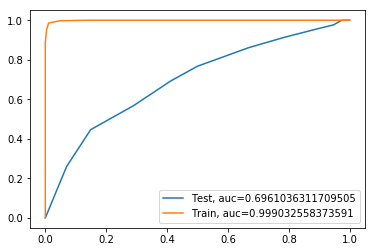

In [266]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba,pos_label='accept')
auc = metrics.roc_auc_score(Y_test,y_pred_proba,)
plt.plot(tpr,fpr,label="Test, auc="+str(auc))
plt.legend(loc=4)
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_train, y_pred_proba,pos_label='accept')
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(tpr,fpr,label="Train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

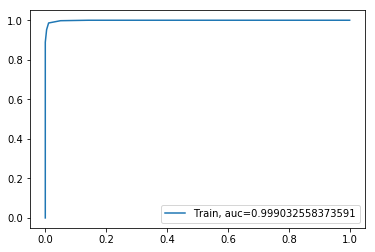

In [264]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_train, y_pred_proba,pos_label='accept')
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(tpr,fpr,label="Train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Saving the pickle file of model and scaler 

In [28]:
# Dump the trained decision tree classifier with Pickle
rf_classifier_pkl_filename = r'.\Manual Models\university_random_forest_predict.pickel'
standard_scaler_filename = r'.\Manual Models\UniversityRFstandardScaler_rf_model.pickel'

random_forest_classifier_model_pkl = open(rf_classifier_pkl_filename, 'wb')
pickle.dump(model, random_forest_classifier_model_pkl)

random_forest_classifier_model_pkl.close()

sc_rf_classifier_scaler_pkl = open(standard_scaler_filename, 'wb')
pickle.dump(sc, sc_rf_classifier_scaler_pkl)

sc_rf_classifier_scaler_pkl.close()

random_forest_classifier_model_pkl = open(rf_classifier_pkl_filename, 'rb')
random_forest_classifier_model= pickle.load(random_forest_classifier_model_pkl)
random_forest_classifier_model_pkl.close()

sc_rf_classifier_scaler_pkl = open(standard_scaler_filename, 'rb')
standard_scaler_rf_classifier= pickle.load(sc_rf_classifier_scaler_pkl)
sc_rf_classifier_scaler_pkl.close()

<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>Test Accuracy</th> 
    <th>Train Accuracy</th>
    <th>Grid Search - Test Accuracy</th> 
    <th>Grid Search - Test Accuracy</th>
    <th>Test F1 Score</th> 
    <th>Train F1 Score</th>
    <th>Best Parameter</th>
    <th>Interpretability</th>
    <th>Reproducability</th>
</tr>
  <tr>
    <th>RandomForestClassifier</th>
    <th>0.83</th>
    <th>0.98</th>
    <th>0.84</th>
    <th>0.99</th>
    <th>0.84</th>
    <th>0.99</th>
    <th>{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'n_estimators': 30}</th>
    <th>Yes</th>
    <th>No</th>
</tr>

</table>